In [1]:
cd /home

/home


In [3]:
import tensorflow as tf
import pandas as pd 

import matplotlib.pyplot as plt

import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

%load_ext autoreload
%autoreload 2

from src.data.loaders import load_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## RECORDS

In [4]:
data = load_data('./data/records/macho_clean/test/',
                    batch_size=32,
                    window_size=1000,
                    sampling=False,
                    nsp_prob=.3)

2023-07-04 17:29:49.632878: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (34)
2023-07-04 17:29:49.632913: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (72d491abb7f6): /proc/driver/nvidia/version does not exist
2023-07-04 17:29:49.633161: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


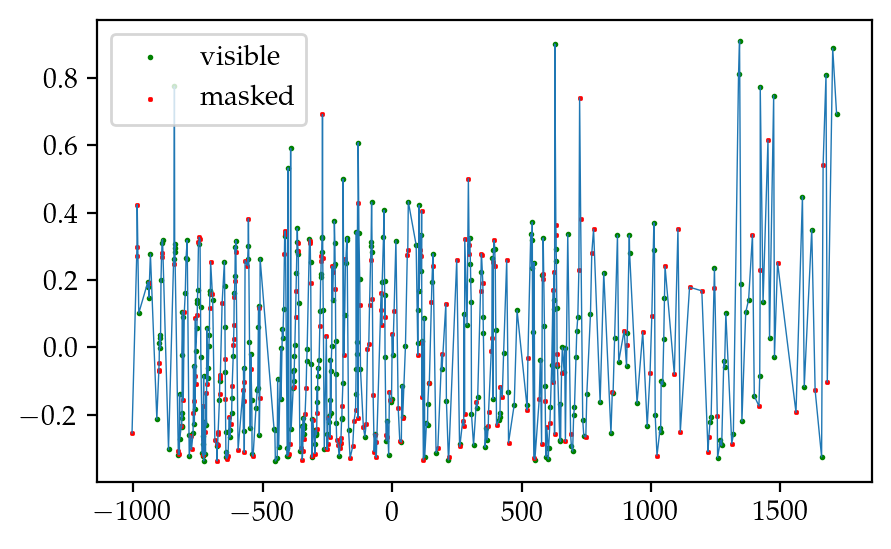

In [5]:
plt.figure(figsize=(5, 3), dpi=200)
for x in data.take(1):
    
    curr_x = x['input'][0]
    curr_att_mask = x['att_mask'][0]
    curr_probed_mask = x['probed_mask'][0] 
    
    masked_x_inp = tf.boolean_mask(curr_x, 1.-curr_att_mask)
    masked_x_out = tf.boolean_mask(curr_x, curr_probed_mask)
    masked_x = tf.boolean_mask(curr_x, x['mask'][0])

#     plt.plot(masked_x_inp)
    plt.scatter(masked_x_inp[:, 0], masked_x_inp[:, 1], marker='o', s=1, color='g', label='visible')
    plt.scatter(masked_x_out[:, 0], masked_x_out[:, 1], marker='s', s=1, color='r', label='masked')
    plt.plot(masked_x[:, 0], masked_x[:, 1], linewidth=0.5)
    plt.legend()
plt.show()

tf.Tensor([0.], shape=(1,), dtype=float32)


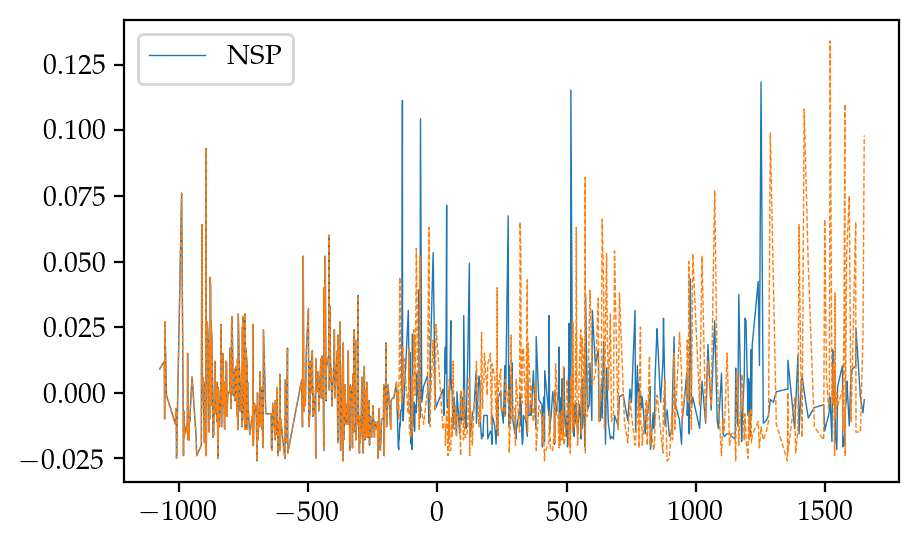

In [6]:
plt.figure(figsize=(5, 3), dpi=200)
for x in data.take(1):
    
#     print(x['a'][0].shape)
#     print(x['b'][0].shape)
    N =1
    masked_x_nsp = tf.boolean_mask(x['nsp_input'][N], x['mask'][N])
    masked_x = tf.boolean_mask(x['input'][N], x['mask'][N])
    print(x['nsp_label'][N])
#     print(x['a'][N][:, 1])
#     print(x['b'][N][:, 1])

    
    plt.plot(masked_x[:, 0], masked_x_nsp[:, 1], linewidth=0.5, label='NSP')
    plt.plot(masked_x[:, 0], masked_x[:, 1], linewidth=0.5, linestyle='--')
    plt.legend()
plt.show()